In [1]:
#Librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii as ascii
import pylab as plb
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import cauchy

### Introduzione

Le cartelle contengono i codici utilizzati per la risoluzione degli esercizi e i risultati di ciascun calcolo. Essi verranno analizzati all'interno del notebook, per un controllo del corretto funzionamento del codice è sufficente compilare utilizzando il comando "make run" all'interno di ciascuna sottocartella per ottenere dei nuovi risultati di output.

## Es. 01.1

Per risolvere numericamente l' integrale \n
$$\langle r \rangle = \int_0^1 r dr = 1/2 \, .$$
sono stati utilizzati  $M = 10^5$ numeri casuali distribuiti uniformemente nell'intervallo $[0,1)$ (*throws*). Per l'analisi di questi dati è stato utilizzato il metodo del *data blocking* (contenuto nei file metodoblocchi.h e metodoblocchi.cpp</font>*) fissando un numero di blocchi pari a $N=1000$. 
    Di seguito è mostrato il grafico che presenta i valori delle medie cumulative e dei rispettivi errori in funzione del numero di throws. Con il termine media cumulativa si intende, per esempio, che il primo valore è ottenuto a partire dai dati contenuti solo nel primo blocco, il secondo valore facendo la media delle medie dei primi di blocchi e cosi via.

In [11]:
plt.figure(figsize=(10,5))
x, y, error = np.loadtxt("C:\Users|steta\Desktop\esame_lab\ris.01.1.1.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y - 0.5, yerr=error, errorevery=10, label = 'Monte Carlo')
plt.axhline(y = 0, color = 'red', linestyle='-.',label = 'Risultato analitico')
plt.title('$<r> =\int_0^1 r dr$', fontsize=20)
plt.xlabel('$Throws$')
plt.ylabel('$<r> - 0.5$')
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-11-020118355fd0>, line 2)

Dal risultato ottenuto si possono notare due comportamenti interessanti: primo, il valore stimato attraverso il Monte Carlo tende a convergere a quello analitico all'aumentare del numero di dati utilizzato per calcolarlo e secondo, l'errore subisce una diminuzione progressiva all'aumentare del numero di dati. Questo risultato è garantito dal teorema del limite centrale poichè tutti i dati contenuti nei sono indipendenti e identicamente distribuite.

Successivamente si valuta l'integrale 

$$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12 \, $$

I metodi utilizzati nell'analisi dei risultati e le considerazioni sono analoghe al caso precedente.

In [12]:

plt.figure(figsize=(10,5))
x, y, error = np.loadtxt("Results/01.1/Results01.1.2.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y -1/12 ,yerr=error,label = 'Monte Carlo', errorevery = 10)
plt.axhline(y=0, color = 'red',linestyle='-.',label = 'Risultato analitico')
plt.title('$\sigma^2 = \int_0^1 (r-1/2)^2 dr$', fontsize=20)
plt.xlabel('$Throws$')
plt.ylabel('$\sigma^2 - 1/12$')
plt.legend()
plt.grid(True)
plt.show()

OSError: Results/01.1/Results01.1.2.out not found.

<Figure size 720x360 with 0 Axes>

In conclusione è possibile effettuare il test del $\chi^2$ per valutare la bontà del generatore di numeri casuali utilizzato precedentemente e cioè verificare se l'ipotesi che i numeri siano estratti da una distribuzione uniforme sia valida. Il test utilizzato è in generale una misura dell'errore tra dei dati osservati, $O_i$, e quelli attesi, $E_i$:

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

Per effetturare il test si è proceduto come segue:
    
    1. Sono stati generati N = 10^6 numeri distribuiti uniformemente nell'intervallo [0,1) e quest'ultimo è stato diviso successivamente in  M = 100 blocchi. Poichè la probabilità che i punti estratti appartengano all'intervallo i-esimo segue una distribuzione binomiale, il numero di quelli attesi in ogni singolo intervallo è n*1/M= n/M
    2. Attraverso un algoritmo si è ricavato il numero di dati osservati andando ad effettuare un conteggio per ogni blocco in cui era diviso l'intervallo ottendo cosi la seguente formula per il calcolo del chi quadro:
    
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M} \\ $$

Il seguente grafico mostra $\chi^2_j$ con $j=1, ..., 100$

In [19]:
plt.figure(figsize=(10,5))
x, y = np.loadtxt("Results/01.1/Results01.1.3.out", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y)
plt.axhline(y=100, color = 'red',linestyle='-.',label = 'Risultato atteso')
plt.xlabel('Blocks')
plt.ylabel(r'$\chi^2$')
plt.title('Test del $\chi^2$',fontsize = 20)
plt.grid(True)
plt.legend()
plt.show()

OSError: Results/01.1/Results01.1.3.out not found.

<Figure size 720x360 with 0 Axes>

Il risulato atteso è in media $(n_i - n/M)^2 \simeq n/M$ e quindi $\chi^2 \simeq 100$ e cioè il numero dei sotto intervalli. Si può osservare che i valori ottenuti dal test fluttuano attorno al valore atteso; ciò ci suggerisce che la distribuzione con cui sono estratti i numeri casuali è da considerarsi uniforme.

## Es. 01.2

Con lo scopo di verificare il teorema del limite centrale è stato modificato il codice del generatore di numeri casuali (contenuto nei file random.h e random.cpp) aggiungendo la possibilità di estrarre numeri casuali distributi secondo una distribuzione esponenziale e di Cauchy-Lorentz, le cui pdf sono rispettivamente: $p(x) = \lambda exp(-\lambda x)$ e $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ , sfruttando il metodo dell'inversa della cumulativa.

Sono stati costruiti 4 istogrammi per ogni distribuzione presa in considerazione (uniforme, esponenziale con $\lambda=1$ e Cauchy-Lorentz con $\mu=0$ e $\Gamma=1$) riempiendoli con $M = 10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ dove $N=\{ 1, 2, 10, 100\}$ rappresenta il numero di "dadi" in ciascun lancio e $x_i$ è una variabile casuale campionata dalla distribuzione in esame.

In [20]:
#Lettura dati
t=ascii.read("Results/01.2/Results01.2.out")
uniform = np.asarray(t['col1'])
exponential = np.asarray(t['col2'])
lorentzian = np.asarray(t['col3'])

FileNotFoundError: [Errno 2] No such file or directory: 'Results/01.2/Results01.2.out'

NameError: name 'uniform' is not defined

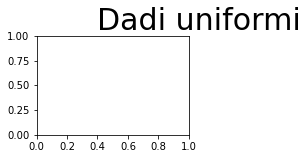

In [21]:
plt.suptitle('Dadi uniformi',fontsize = 30)

plt.subplot(2,2,1)
plt.hist(uniform[0:10000],100,density=True)
plt.title('Un dado',fontsize=14)
plt.xlabel(r'$S_N$',fontsize=12)

plt.subplot(2,2,2)
plt.hist(uniform[10000:20000],50, density=True)
plt.title('Due dadi',fontsize = 14)
plt.xlabel(r'$S_N$',fontsize=12)

plt.subplot(2,2,3)
plt.hist(uniform[20000:30000],20,density=True)
plt.title('Dieci dadi',fontsize = 14)
plt.xlabel(r'$S_N$',fontsize=12)

plt.subplot(2,2,4)
mu, std = norm.fit(uniform[30000:40000])
plt.hist(uniform[30000:40000],52, density=True,label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='red',label='Fit')
plt.title('Cento dadi',fontsize = 14)
plt.xlabel(r'$S_N$',fontsize=12)
plt.legend()
plt.show()

NameError: name 'exponential' is not defined

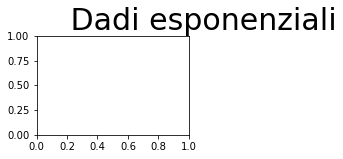

In [22]:
plt.suptitle(' Dadi esponenziali',fontsize = 30)


plt.subplot(2,2,1)
plt.hist(exponential[0:10000],100,density =True, color ='green')
plt.title('Un dado',fontsize=14)
plt.xlabel(r'$S_N$',fontsize=12)

plt.subplot(2,2,2)
plt.hist(exponential[10000:20000],100,density=True, color ='green')
plt.title('Due dadi',fontsize = 14)
plt.xlabel(r'$S_N$',fontsize=12)

plt.subplot(2,2,3)
plt.hist(exponential[20000:30000],100,density=True, color ='green')
plt.title('Dieci dadi',fontsize = 14)
plt.xlabel(r'$S_N$',fontsize=12)

plt.subplot(2,2,4)
mu, std = norm.fit(exponential[30000:40000])
plt.hist(exponential[30000:40000],30, density=True,label='Data', color ='green')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='red',label='Fit')
plt.title('Cento dadi',fontsize = 14)
plt.xlabel(r'$S_N$',fontsize=12)
plt.legend()
plt.show()

NameError: name 'lorentzian' is not defined

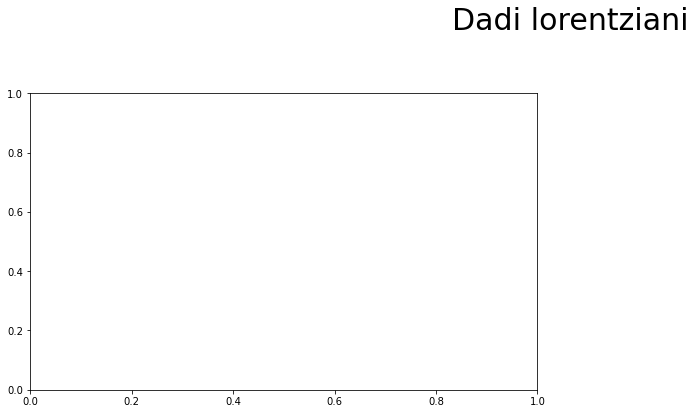

In [23]:
plt.figure(figsize=(20,12))
plt.suptitle('Dadi lorentziani',fontsize = 30)

plt.subplot(2,2,1)
plt.hist(lorentzian[0:10000],2000,density=True, color = 'red')
plt.xlim(-100,100)
plt.title('Un dado',fontsize=14)
plt.xlabel(r'$S_N$',fontsize=12)

plt.subplot(2,2,2)
plt.hist(lorentzian[10000:20000],2000,density=True, color = 'red')
plt.xlim(-100,100)
plt.title('Due dadi',fontsize = 14)
plt.xlabel(r'$S_N$',fontsize=12)

plt.subplot(2,2,3)
plt.hist(lorentzian[20000:30000],9000,density=True, color = 'red')
plt.xlim(-100,100)
plt.title('Dieci dadi',fontsize = 14)
plt.xlabel(r'$S_N$',fontsize=12)

plt.subplot(2,2,4)
mu, std = cauchy.fit(lorentzian[30000:40000])
plt.hist(lorentzian[30000:40000],4000,density=True,label='Data', color = 'red')
plt.xlim(-70,70)
xmin, xmax = plt.xlim()
x = np.linspace(-20, 20)
p = cauchy.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='green',label='Fit')
plt.title('Cento dadi',fontsize = 14)
plt.xlabel(r'$S_N$',fontsize=12)
plt.legend()
plt.show()

Si possono trarre le seguenti conclusioni:

Come si può osservare dagli istogrammi sopra riportati, nel caso di lanci di dadi uniformi ed esponenziali al crescere del numero di dadi per ciascun lancio la distribuzione degli $S_N$ approssima sempre meglio quello di una gaussiana, come viene confermato anche dal fit effettuato nel caso con 100 lanci. Infatti il teorema del limite centrale assicura che, considerando $N$ variabili casuali statisticamente indipendenti e identicamente distribuite secondo una distribuzione che possiede entrambi i primi due cumulanti (finiti), allora si ha che la variabile media $S_N$ è asintoticamente distribuita secondo una gaussiana.

La distribuzione di Cauchy-Lorentz invece non rispetta le ipotesi del teorema del limite centrale poichè possiede una varianza infinita e dunque gli istogrammi dei dadi lorentziani non vengono approssimati da una gaussiana al crescere di $N$. Tuttavia, la distribuzione di Cauchy-lorentz è una distribuzione di Levy poichè è invariante per convoluzione e di conseguenza è applicabile il teorema di Levy-Khintchine, secondo il quale essa può solo essere una distribuzione limite. Di conseguenza, come viene anche confermato dal fit, la distribuzione degli dati generati secondo una Cauchy-Lorentz tende a una distribuzione di Cauchy-Lorentz.

## Es. 01.3

Un metodo per effettuare una stima del $\pi$ è l'esperimento proposto di Buffon, il quale consiste nel lancio ripetuto di un ago di lunghezza $L$ su una superficie suddivisa da linee orizzontali poste a una distanza $d$ l'una dall'altra. Si può dimostrare che la probabilità che l'ago intersechi una delle righe è $P = \frac{2L}{\pi d}$. Di conseguenza è possibile ottenere una stima del $\pi$ attraverso:

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d} \, ,$$
dove $N_{thr}$ è il numero di lanci effettuati e $N_{hit}$ è il numero di volte in cui l'ago ha intersecato una delle righe.

Per simulare questo esperimento si è presa in considerazione come lunghezza dell'ago $L=3$ e come distanza $d=7$. I valori scelti sono del tutto arbitrari tenendo però in considerazione il fatto che se $d\gg L$ di conseguenza la probabilità di intersezione $P\ll 1$. Il problema in considerazione gode di una simmetria traslazionale lungo l'asse delle ordinate (considerando le righe disposte parallele all'asse delle ascisse) perciò è possibile considerare $-d/2<y<d/2$ e $-\infty < x < +\infty$ immaginandosi un'unica riga posta in $x=0$.

Vengono estratti casualmente nell'intervallo $[-d/2;d/2]$ i centri dell'ago e l'angolo di inclinazione rispetto alla normale.  Una volte ottenute queste informazioni è possibile ricavare gli estremi dell'ago e valutare se esso interseca la riga incrementando di conseguenza $N_{hit}$. Sono stati effettuati $M = 2\times10^4$ di esperimenti di Buffon ciascuno dei quali prevede $N_{thr} = 2\times 10^4$ numero di lanci. Sulle stime ottenute da ciascuno esperimento viene effettuato il metodo del data blocking.

Di seguito è riportato il grafico con i risulatati ottenuti.

In [25]:
plt.figure(figsize=(10,5))
x, y, error = np.loadtxt("Results/01.3/Results01.3.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y - np.pi ,yerr=error, label = 'Monte Carlo')
plt.xlabel(r'$N_{blocks}$')
plt.ylabel("$<\pi> - 3.141592653589793$")
plt.axhline(y=0, color = 'red',linestyle='-.',label = r'\pi')
plt.title('$\pi$', fontsize=20)
plt.grid(True)

plt.show()

OSError: Results/01.3/Results01.3.out not found.

<Figure size 720x360 with 0 Axes>

Dal grafico soprastante si può evincere che il valore stimato con il Monte Carlo è compatibile con quello teorico.